In [1]:
import keras

In [2]:
# Cargar el conjunto de datos Fashion MNIST
fmnist = keras.datasets.fashion_mnist

In [3]:
# Cargar la división de entrenamiento y prueba del conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


label: 0
image: 
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16 

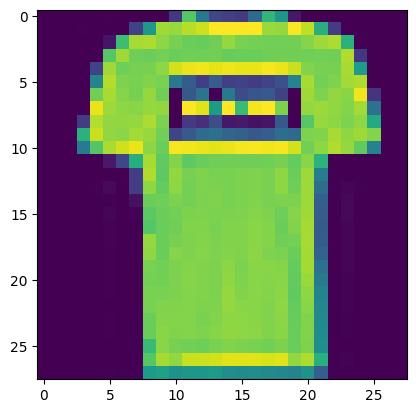

In [4]:
# Visualización de una muestra
import numpy as np
import matplotlib.pyplot as plt
# se puede poner un valor entre 0 y 59999
index = 1
# Imprime la etiqueta y laimagen
np.set_printoptions(linewidth=320)
print(f'label: {train_labels[index]}')
print(f'image: \n {train_images[index]}')
# Visualiza la imagen
plt.imshow(train_images[index])

In [5]:
# Normalizar los valores de píxeles y probar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
import pandas as pd
df_train_images = pd.DataFrame(train_images.reshape(train_images.shape[0], -1))
df_test_images = pd.DataFrame(test_images.reshape(test_images.shape[0], -1))

df_train_labels = pd.DataFrame(train_labels, columns=['label'])
df_test_labels = pd.DataFrame(test_labels, columns=['label'])

df_train = pd.concat([df_train_images, df_train_labels], axis=1)
df_test = pd.concat([df_test_images, df_test_labels], axis=1)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
# Construir el modelo de clasificación
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 472042 (1.80 MB)
Trainable params: 472042 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 39s 17ms/step - loss: 0.4861 - accuracy: 0.8232 - val_loss: 0.4224 - val_accuracy: 0.8444
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3657 - accuracy: 0.8655 - val_loss: 0.3771 - val_accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3292 - accuracy: 0.8783 - val_loss: 0.3591 - val_accuracy: 0.8679
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3023 - accuracy: 0.8881 - val_loss: 0.3542 - val_accuracy: 0.8712
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2838 - accuracy: 0.8937 - val_loss: 0.3394 - val_accuracy: 0.8724
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2699 - accuracy: 0.8994 - val_loss: 0.3615 - val_accuracy: 0.8721
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2549 - accuracy: 0.9038 - val_loss: 0.3394 - val_a

<Axes: >

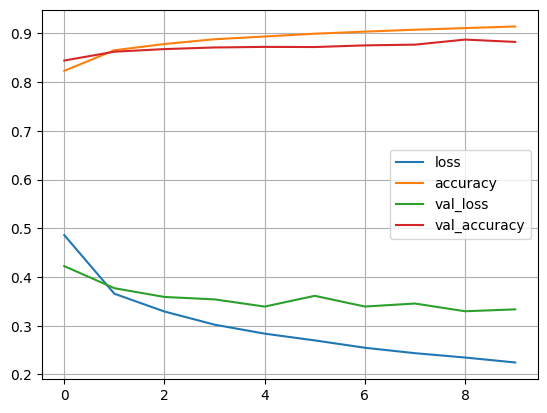

In [10]:
# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [11]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(train_images, train_labels)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')
#

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2135 - accuracy: 0.9183
loss: 0.21354913711547852
accuracy: 0.9182833433151245


In [12]:
# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')
#

313/313 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.8826
loss: 0.33362656831741333
accuracy: 0.8826000094413757


In [13]:
# Predicción de una muestra
index = 1
print(f'label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'classification: \n {classification.reshape(-1,1)}')

label: 2
1/1 [==============================] - 0s 110ms/step
classification: 
 [[2.8216976e-04]
 [9.6243305e-11]
 [9.8737979e-01]
 [3.0206298e-08]
 [8.8616638e-03]
 [4.7610058e-09]
 [3.4763538e-03]
 [2.7935648e-13]
 [2.2621700e-08]
 [5.6753695e-12]]
